In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [2]:
from sklearn .feature_selection import RFE
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [4]:
dataset = pd.read_csv("forestfires.csv")

In [5]:
print(dataset)

     X  Y month  day    DMC     DC   ISI  temp  RH  wind   area
0    7  5   mar  fri   26.2   94.3   5.1   8.2  51   6.7   0.00
1    7  4   oct  tue   35.4  669.1   6.7  18.0  33   0.9   0.00
2    7  4   oct  sat   43.7  686.9   6.7  14.6  33   1.3   0.00
3    8  6   mar  fri   33.3   77.5   9.0   8.3  97   4.0   0.00
4    8  6   mar  sun   51.3  102.2   9.6  11.4  99   1.8   0.00
..  .. ..   ...  ...    ...    ...   ...   ...  ..   ...    ...
512  4  3   aug  sun   56.7  665.6   1.9  27.8  32   2.7   6.44
513  2  4   aug  sun   56.7  665.6   1.9  21.9  71   5.8  54.29
514  7  4   aug  sun   56.7  665.6   1.9  21.2  70   6.7  11.16
515  1  4   aug  sat  146.0  614.7  11.3  25.6  42   4.0   0.00
516  6  3   nov  tue    3.0  106.7   1.1  11.8  31   4.5   0.00

[517 rows x 11 columns]


In [6]:
x2 =  dataset.iloc[:,0:10].values
y2 =  dataset.iloc[:,:10].values

In [7]:
print(x2.size,y2.size)

5170 5170


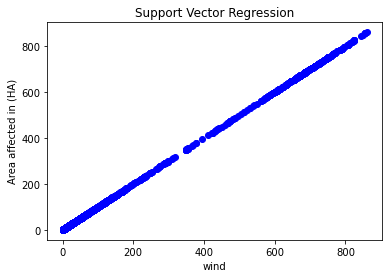

In [8]:
arr = ['X','Y','month','day','DMC','DC','ISI','temp','RH','wind']
for i in range(10):
    if(i==2 or i==3):
        continue
    else:
        x1=x2[:,i]
        y1=y2[:,i]
        plt.scatter(x1,y1,color='blue')
        plt.xlabel(arr[i])
        plt.ylabel('Area affected in (HA)')
        plt.title('Support Vector Regression')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA04E66E20>,
      dtype=object)

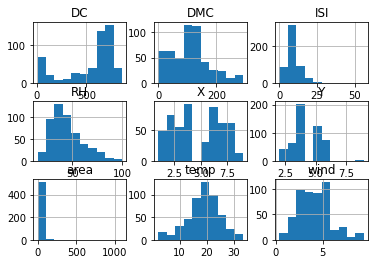

In [9]:
dataset.hist()

Text(0, 0.5, 'AREA AFFECTED IN (HA)')

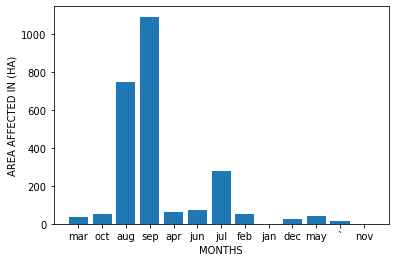

In [10]:
dataset1=pd.read_csv("forestfires.csv")
x1 = dataset1.iloc[:,2]
y1=dataset1.iloc[:,10].values
x2=dataset1.iloc[:,3]
plt.bar(x1,y1)
plt.xlabel('MONTHS')
plt.ylabel('AREA AFFECTED IN (HA)')

Text(0, 0.5, 'AREA AFFECTED IN (HA)')

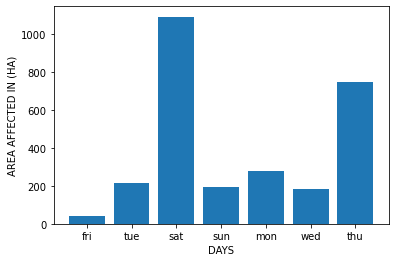

In [11]:
plt.bar(x2,y1)
plt.xlabel('DAYS')
plt.ylabel('AREA AFFECTED IN (HA)')

In [12]:
le = LabelEncoder()

dataset['month'] = le.fit_transform(dataset['month'])
dataset['day'] = le.fit_transform(dataset['day'])
dataset.isnull().any()

X        False
Y        False
month    False
day      False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
area     False
dtype: bool

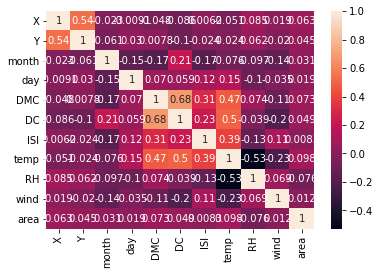

In [13]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot = True)

In [14]:
dataset

,X,Y,month,day,DMC,DC,ISI,temp,RH,wind,area
0,7,5,8,0,26.2,94.3,5.1,8.2,51,6.7,0.00
1,7,4,11,5,35.4,669.1,6.7,18.0,33,0.9,0.00
2,7,4,11,2,43.7,686.9,6.7,14.6,33,1.3,0.00
3,8,6,8,0,33.3,77.5,9.0,8.3,97,4.0,0.00
4,8,6,8,3,51.3,102.2,9.6,11.4,99,1.8,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,2,3,56.7,665.6,1.9,27.8,32,2.7,6.44
513,2,4,2,3,56.7,665.6,1.9,21.9,71,5.8,54.29
514,7,4,2,3,56.7,665.6,1.9,21.2,70,6.7,11.16
515,1,4,2,2,146.0,614.7,11.3,25.6,42,4.0,0.00


In [15]:
x = dataset.iloc[:,0:9].values
y = dataset.iloc[:,9:10].values

In [16]:
print(x)

[[ 7.   5.   8.  ...  5.1  8.2 51. ]
 [ 7.   4.  11.  ...  6.7 18.  33. ]
 [ 7.   4.  11.  ...  6.7 14.6 33. ]
 ...
 [ 7.   4.   2.  ...  1.9 21.2 70. ]
 [ 1.   4.   2.  ... 11.3 25.6 42. ]
 [ 6.   3.  10.  ...  1.1 11.8 31. ]]


In [17]:
print(y)

[[6.7]
 [0.9]
 [1.3]
 [4. ]
 [1.8]
 [5.4]
 [3.1]
 [2.2]
 [5.4]
 [4. ]
 [7.2]
 [4. ]
 [6.7]
 [2.2]
 [4.5]
 [5.4]
 [5.4]
 [4.9]
 [4. ]
 [4.5]
 [2.7]
 [2.7]
 [4.5]
 [5.8]
 [5.8]
 [5.4]
 [5.8]
 [1.3]
 [2.7]
 [3.6]
 [3.6]
 [7.6]
 [1.8]
 [3.6]
 [2.7]
 [4.5]
 [4.5]
 [5.4]
 [4. ]
 [2.7]
 [3.1]
 [6.7]
 [5.4]
 [2.7]
 [4.9]
 [4. ]
 [3.6]
 [3.1]
 [1.8]
 [5.8]
 [1.3]
 [2.2]
 [4.9]
 [4.9]
 [3.6]
 [2.2]
 [4.9]
 [2.7]
 [5.4]
 [0.9]
 [5.8]
 [6.3]
 [4.9]
 [2.7]
 [3.1]
 [4.5]
 [4.5]
 [5.4]
 [6.3]
 [4.5]
 [7.6]
 [3.6]
 [6.3]
 [4.5]
 [1.3]
 [3.1]
 [3.1]
 [3.1]
 [2.7]
 [6.7]
 [6.3]
 [2.2]
 [4.5]
 [0.9]
 [3.6]
 [0.9]
 [2.2]
 [2.2]
 [3.6]
 [4.9]
 [5.8]
 [5.4]
 [6.3]
 [4.9]
 [2.7]
 [1.3]
 [1.8]
 [5.4]
 [4.5]
 [5.4]
 [5.4]
 [5.4]
 [4. ]
 [4.5]
 [3.1]
 [6.3]
 [3.1]
 [3.1]
 [3.1]
 [5.4]
 [5.8]
 [4.5]
 [3.6]
 [2.7]
 [7.6]
 [6.3]
 [6.3]
 [4.9]
 [4. ]
 [3.1]
 [2.2]
 [5.4]
 [5.4]
 [3.1]
 [5.4]
 [5.4]
 [2.2]
 [3.1]
 [3.6]
 [0.9]
 [2.7]
 [3.1]
 [4.9]
 [3.1]
 [2.7]
 [5.8]
 [1.3]
 [3.1]
 [2.7]
 [2.2]
 [1.8]
 [4.5]
 [8.9]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 42)
reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
y_pred = reg_all.predict(x_test)

In [69]:
print("R^2: {}".format(reg_all.score(x_test, y_test)))
rmse = np.sqrt(y_test,y_pred)
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.07135461694724488
Root Mean Squared Error: [[2.21359436]
 [2.21359436]
 [1.34164079]
 [2.21359436]
 [2.21359436]
 [1.76068169]
 [2.        ]
 [1.64316767]
 [1.76068169]
 [1.4832397 ]
 [1.8973666 ]
 [1.64316767]
 [1.34164079]
 [1.8973666 ]
 [2.68328157]
 [1.34164079]
 [1.64316767]
 [1.8973666 ]
 [2.21359436]
 [2.32379001]
 [2.40831892]
 [2.21359436]
 [2.91547595]
 [2.50998008]
 [2.32379001]
 [1.76068169]
 [1.76068169]
 [1.34164079]
 [1.34164079]
 [1.64316767]
 [2.75680975]
 [2.12132034]
 [1.34164079]
 [2.        ]
 [2.50998008]
 [2.12132034]
 [1.14017543]
 [2.21359436]
 [2.12132034]
 [1.64316767]
 [1.8973666 ]
 [2.50998008]
 [1.14017543]
 [1.4832397 ]
 [1.4832397 ]
 [2.21359436]
 [1.76068169]
 [3.06594194]
 [2.21359436]
 [2.        ]
 [2.40831892]
 [2.        ]
 [1.8973666 ]
 [1.64316767]
 [2.21359436]
 [2.75680975]
 [1.14017543]
 [1.64316767]
 [1.4832397 ]
 [1.76068169]
 [0.63245553]
 [2.12132034]
 [2.32379001]
 [2.12132034]
 [1.76068169]
 [1.4832397 ]
 [1.8973666 ]
 [1.4832397 

In [70]:
reg_all.score(x_test,y_test)

0.07135461694724488

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf= RandomForestRegressor()

In [73]:
rf.fit(x_train,y_train)

<ipython-input-73-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor()

In [74]:
y_pred = rf.predict(x_test)
y_pred

array([3.343, 4.739, 2.765, 3.987, 3.989, 4.021, 4.668, 2.889, 2.923,
       5.046, 3.376, 2.969, 2.227, 3.496, 3.087, 4.818, 6.388, 3.809,
       5.843, 5.088, 5.548, 4.341, 7.285, 5.377, 4.124, 3.385, 3.917,
       4.466, 2.852, 4.773, 4.784, 3.448, 2.361, 3.231, 5.446, 4.723,
       5.404, 3.513, 4.09 , 3.258, 3.232, 5.213, 4.035, 3.35 , 3.374,
       6.052, 5.174, 5.347, 5.159, 5.017, 3.787, 3.525, 4.637, 3.122,
       4.029, 6.538, 3.955, 2.296, 3.581, 4.307, 3.802, 4.071, 5.324,
       3.887, 3.096, 4.852, 3.378, 2.924, 5.32 , 5.791, 4.511, 2.805,
       7.205, 4.721, 3.578, 4.601, 3.965, 4.02 , 3.515, 3.434, 5.239,
       2.998, 3.147, 5.115, 4.265, 6.161, 5.023, 3.756, 8.089, 4.677,
       5.298, 4.859, 2.833, 5.176, 3.91 , 3.211, 4.677, 3.509, 3.164,
       4.993, 6.167, 6.421, 5.868, 3.228, 3.086, 2.458, 3.329, 3.748,
       3.222, 3.607, 3.122, 5.619, 6.025, 3.163, 3.205, 4.919, 4.215,
       2.895, 3.374, 4.212, 4.689, 2.896, 4.136, 3.528, 3.647, 3.91 ,
       3.316, 2.243,

(array([ 9., 38., 32., 18., 32., 13.,  7.,  3.,  2.,  2.]),
 array([2.227 , 2.8171, 3.4072, 3.9973, 4.5874, 5.1775, 5.7676, 6.3577,
        6.9478, 7.5379, 8.128 ]),
 <a list of 10 Patch objects>)

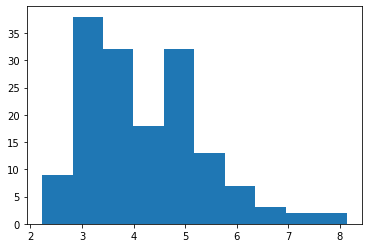

In [75]:
plt.hist(y_pred)

In [76]:
rf.score(x_test,y_test)

0.24861374209086173

In [77]:
reg_all.predict([[3,4,10,4,65.5,89,7,45,43]])

array([[1.16795376]])